# KNN model

In [59]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


In [60]:
file_name ='UPDATEDDataset.csv'
data = pd.read_csv('UPDATEDDataset.csv') 
data.drop_duplicates(inplace=True)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dc1          191 non-null    float64
 1   Dc2          191 non-null    float64
 2   hC           191 non-null    float64
 3   tC1          191 non-null    float64
 4   tC2          191 non-null    float64
 5   PC           191 non-null    float64
 6   Lamda1       191 non-null    float64
 7   A1           191 non-null    float64
 8   Lamda2       191 non-null    float64
 9   A2           191 non-null    float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(18)
memory usage: 27.0 KB


In [61]:
# Define target variables
target_variables = ['Lamda1', 'A1', 'Lamda2', 'A2']


In [62]:
# Loop through each target variable
for target_var in target_variables:
    # Separate features (independent variables) and target variable
    X = data[['Dc1', 'Dc2', 'hC', 'tC1', 'tC2', 'PC']]
    y = data[target_var]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling (standardization)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Instantiate KNN regressor with k=5
    knn_regressor = KNeighborsRegressor(n_neighbors=5)

    # Train the model
    knn_regressor.fit(X_train_scaled, y_train)

    # Predictions on the testing set
    y_pred = knn_regressor.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"For target variable {target_var}:")
    print("Mean Squared Error:", mse)


For target variable Lamda1:
Mean Squared Error: 0.08787692307692319
For target variable A1:
Mean Squared Error: 0.41102389435897113
For target variable Lamda2:
Mean Squared Error: 0.3326153846153848
For target variable A2:
Mean Squared Error: 0.10600974461538229


# Hyperparameter Tuning 

In [63]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define target variables
target_variables = ['Lamda1', 'A1', 'Lamda2', 'A2']

# Perform hyperparameter tuning for each target variable
for target_var in target_variables:
    # Separate features (independent variables) and target variable
    X = data[['Dc1', 'Dc2', 'hC', 'tC1', 'tC2', 'PC']]
    y = data[target_var]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling (standardization)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define hyperparameters to tune
    param_grid = {'n_neighbors': np.arange(1, 21)}  # Adjust the range as needed

    # Instantiate KNN regressor
    knn_regressor = KNeighborsRegressor()

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_n_neighbors = grid_search.best_params_['n_neighbors']

    # Train the model with the best hyperparameters
    best_knn_regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    best_knn_regressor.fit(X_train_scaled, y_train)

    # Predictions on the testing set
    y_pred = best_knn_regressor.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"For target variable {target_var}:")
    print("Best n_neighbors:", best_n_neighbors)
    print("Mean Squared Error:", mse)


For target variable Lamda1:
Best n_neighbors: 3
Mean Squared Error: 0.08780626780626785
For target variable A1:
Best n_neighbors: 2
Mean Squared Error: 0.12602258974358999
For target variable Lamda2:
Best n_neighbors: 2
Mean Squared Error: 0.34923076923076934
For target variable A2:
Best n_neighbors: 3
Mean Squared Error: 0.07763699145299152


# R2 score evaluation

In [64]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define target variables
target_variables = ['Lamda1', 'A1', 'Lamda2', 'A2']

# Perform hyperparameter tuning for each target variable
for target_var in target_variables:
    r2_score_train = 0
    while r2_score_train < 0.9:
        # Separate features (independent variables) and target variable
        X = data[['Dc1', 'Dc2', 'hC', 'tC1', 'tC2', 'PC']]
        y = data[target_var]

        # Splitting the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Feature scaling (standardization)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Define hyperparameters to tune
        param_grid = {'n_neighbors': np.arange(1, 21)}  # Adjust the range as needed

        # Instantiate KNN regressor
        knn_regressor = KNeighborsRegressor()

        # Perform GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train)

        # Get the best hyperparameters
        best_n_neighbors = grid_search.best_params_['n_neighbors']

        # Train the model with the best hyperparameters
        best_knn_regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
        best_knn_regressor.fit(X_train_scaled, y_train)

        # Predictions on the training set
        y_pred_train = best_knn_regressor.predict(X_train_scaled)

        # Evaluate the model on training set
        r2_score_train = r2_score(y_train, y_pred_train)
        print(f"For target variable {target_var}:")
        print("Best n_neighbors:", best_n_neighbors)
        print("R2 Score on Training Set:", r2_score_train)
        
        # If R2 score is lower than 0.9, retrain the model
        if r2_score_train < 0.9:
            print("Retraining the model as R2 score is lower than 0.9...")


For target variable Lamda1:
Best n_neighbors: 3
R2 Score on Training Set: 0.9715770621449227
For target variable A1:
Best n_neighbors: 2
R2 Score on Training Set: 0.9933655557246162
For target variable Lamda2:
Best n_neighbors: 2
R2 Score on Training Set: 0.9722292522713378
For target variable A2:
Best n_neighbors: 3
R2 Score on Training Set: 0.995633488232179


###### above modified code checks the R2 score of the model trained on the training set. If the R2 score is lower than 0.9, it re-enters the hyperparameter tuning loop, optimizing the model again until the R2 score meets the required threshold.

# Optimized KNN code 

# HeatMap

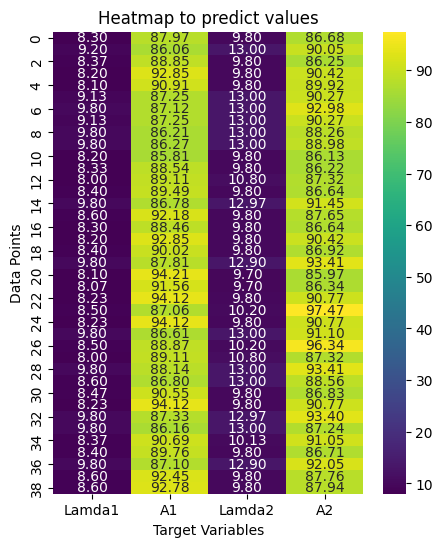

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# target variables
target_variables = ['Lamda1', 'A1', 'Lamda2', 'A2']

# DataFrame to store predicted values
predicted_df = pd.DataFrame()

#  hyperparameter tuning for each target variable
for target_var in target_variables:
    #  features (independent variables) and target variable
    X = data[['Dc1', 'Dc2', 'hC', 'tC1', 'tC2', 'PC']]
    y = data[target_var]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling (standardization)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Instantiate KNN regressor with k=3
    knn_regressor = KNeighborsRegressor(n_neighbors=3)

    # Train the model
    knn_regressor.fit(X_train_scaled, y_train)

    # Predictions on the testing set
    y_pred = knn_regressor.predict(X_test_scaled)
    
    # Store predicted values in DataFrame
    predicted_df[target_var] = y_pred

# Create a heatmap of predicted values
plt.figure(figsize=(5, 6))
sns.heatmap(predicted_df, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title("Heatmap to predict values")
plt.xlabel("Target Variables")
plt.ylabel("Data Points")
plt.xticks(ticks=np.arange(0.5, len(target_variables) + 0.5), labels=target_variables)
plt.show()


# plot for opt. knn

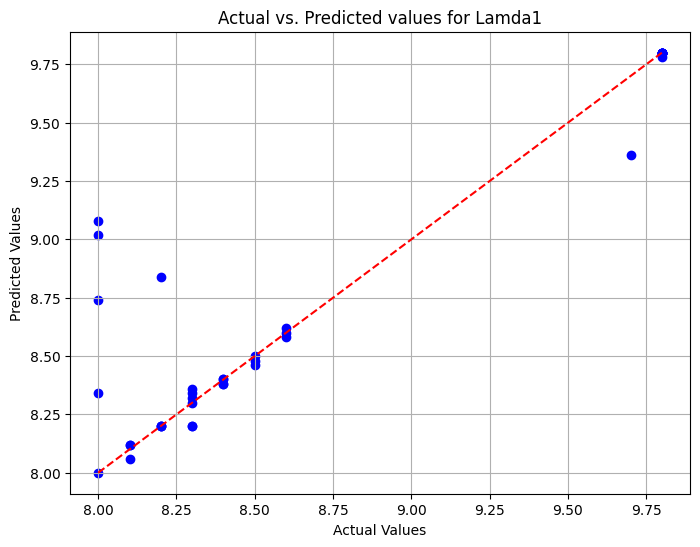

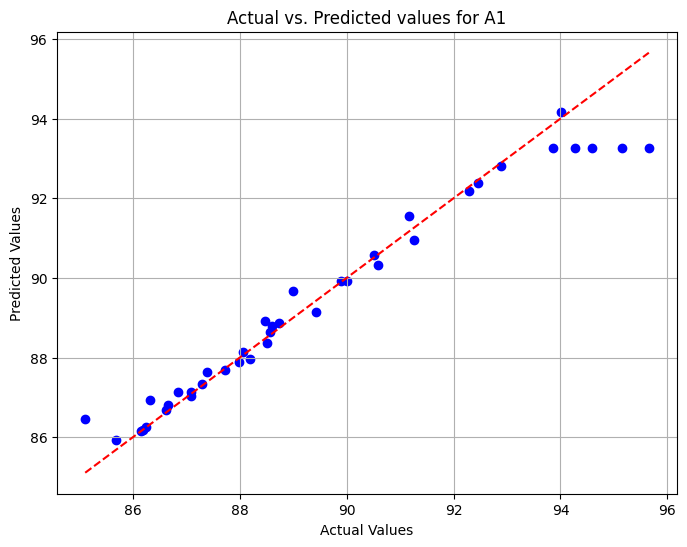

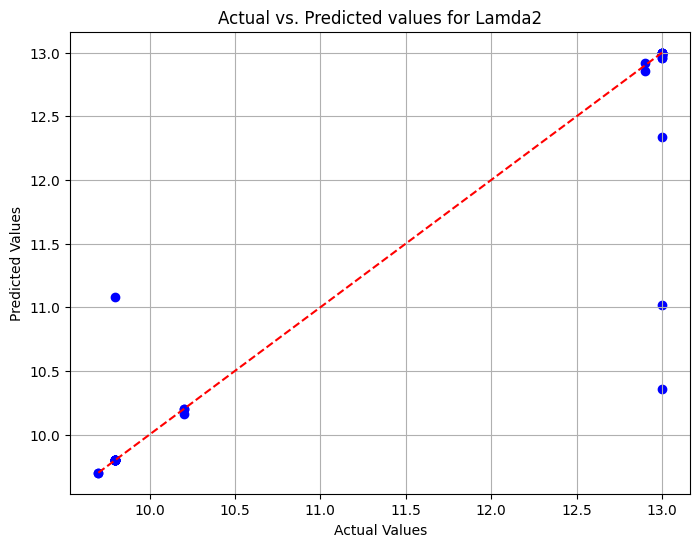

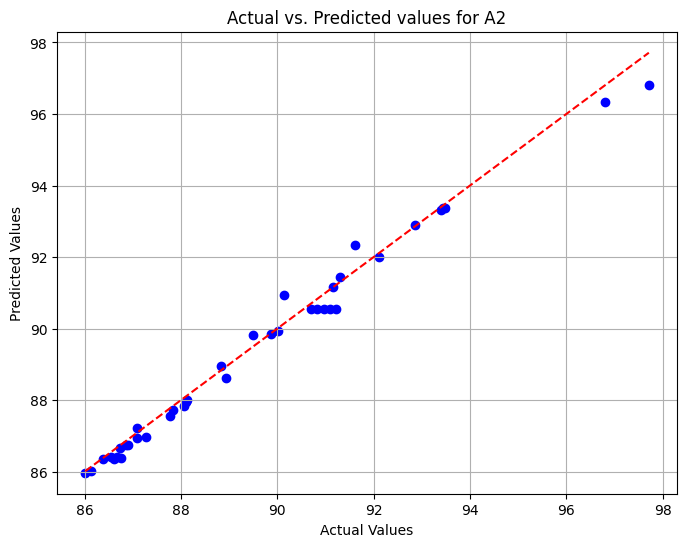

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define target variables
target_variables = ['Lamda1', 'A1', 'Lamda2', 'A2']

# Perform hyperparameter tuning for each target variable
for target_var in target_variables:
    # Separate features (independent variables) and target variable
    X = data[['Dc1', 'Dc2', 'hC', 'tC1', 'tC2', 'PC']]
    y = data[target_var]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling (standardization)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Instantiate KNN regressor with optimal hyperparameters (found during tuning)
    knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Assuming 5 neighbors as optimal

    # Train the model
    knn_regressor.fit(X_train_scaled, y_train)

    # Predictions on the testing set
    y_pred = knn_regressor.predict(X_test_scaled)
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f"Actual vs. Predicted values for {target_var}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()


## best feature value 


import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

def find_optimal_values(df, test_features, value_ranges):
    """
    Find the optimal value for each test feature using grid search.

    Parameters:
    - df: DataFrame containing the dataset
    - test_features: List of names of the test features
    - value_ranges: List of lists, each inner list contains values to search over for a feature

    Returns:
    - Dictionary containing the optimal value for each test feature
    """

    # Define a dictionary to store optimal values for each feature
    optimal_values = {}

    # Iterate over each test feature
    for feature, values in zip(test_features, value_ranges):
        # Define the parameter grid for the current feature
        param_grid = {feature: values}

        # Initialize RandomForestRegressor (or any other appropriate model)
        model = RandomForestRegressor()

        # Perform Grid Search for the current feature
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(df[[feature]], df.iloc[:, 6:])

        # Get the optimal value for the current feature
        optimal_value = grid_search.best_params_[feature]

        # Store the optimal value in the dictionary
        optimal_values[feature] = optimal_value

    return optimal_values

# Example usage:
# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('UPDATEDDataset.csv')

# Define the names of the test features and the values to search over for each feature
test_features = ['Dc1', 'Dc2', 'hC', 'tC1', 'tC2', 'PC']
value_ranges = [[0.8, 0.9, 1.0, 1.1, 1.2],  # Values for Dc1
                [1.21, 1.3, 1.4, 1.5],  # Values for Dc2
                [7.1, 8.0, 9.0, 10.0],  # Values for hC
                [0.11, 0.5, 0.7, 1.0],  # Values for tC1
                [0.5, 0.5, 0.5, 0.5, 0.5],  # Values for tC2
                [1.5, 1.5, 1.5, 1.5, 1.5]]  # Values for PC

# Find optimal values for each feature
optimal_values = find_optimal_values(df, test_features, value_ranges)

# Print optimal values for each feature
for feature, value in optimal_values.items():
    print(f"Optimal value for {feature}: {value}")